In [39]:
import warnings
warnings.filterwarnings("ignore")
import os
#To disable all logging output from TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [54]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential

In [41]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [42]:
# flatten the input
xtrain_flatten = xtrain.reshape((60000, 28*28))
xtrain_flatten.shape

(60000, 784)

In [43]:
xtrain_flatten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [44]:
# convert output to one hot encoded matrix -> multi-class classification
ytrain_categorical = tf.keras.utils.to_categorical(ytrain)
ytrain_categorical.shape

(60000, 10)

In [45]:
def model_ann():
    '''
    creates a ANN model by stacking dense layers 
    '''
    # initialize the Sequential API to stack the layers
    model = keras.Sequential()
    
    # first hidden layer
    model.add(
        keras.layers.Dense(
            units=25, 
            activation='relu',
            input_shape=(28*28, )
        )
    )
    #second hidden layer
    model.add(
        keras.layers.Dense(
            units=25,
            activation='relu'
        )
    )
    # dropout: randomly set 20% of the previous output to zero
    model.add(
        keras.layers.Dropout(
            rate=0.2
        )
    )
    # output layer with softmax activation function
    model.add(
        keras.layers.Dense(
            units=10,
            activation='softmax'
        )
    )
    # compile model
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.categorical_crossentropy,
        metrics=[keras.metrics.categorical_accuracy]
    )

    return model

In [46]:
K.clear_session()
model = model_ann()

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
Total params: 20,535
Trainable params: 20,535
Non-trainable params: 0
_________________________________________________________________


**Fit Model**

In [48]:
# early stopping
stop_early = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5
)

In [49]:
results = model.fit(
    xtrain_flatten,
    ytrain_categorical, 
    epochs=100, # number of iterations through the complete dataset            
    batch_size=500, # number of observations used when updating weights, gradient        
    validation_split=0.2, # 20% of the data is used for validation
    callbacks=[stop_early]
)

Epoch 1/100
96/96 [==============================] - 3s 15ms/step - loss: 9.5893 - categorical_accuracy: 0.2451 - val_loss: 2.0358 - val_categorical_accuracy: 0.2477
Epoch 2/100
96/96 [==============================] - 1s 7ms/step - loss: 2.0441 - categorical_accuracy: 0.2549 - val_loss: 1.8813 - val_categorical_accuracy: 0.3001
Epoch 3/100
96/96 [==============================] - 1s 7ms/step - loss: 1.9013 - categorical_accuracy: 0.3113 - val_loss: 1.7382 - val_categorical_accuracy: 0.3667
Epoch 4/100
96/96 [==============================] - 1s 7ms/step - loss: 1.7668 - categorical_accuracy: 0.3663 - val_loss: 1.6660 - val_categorical_accuracy: 0.4083
Epoch 5/100
96/96 [==============================] - 1s 7ms/step - loss: 1.6452 - categorical_accuracy: 0.4225 - val_loss: 1.5112 - val_categorical_accuracy: 0.4753
Epoch 6/100
96/96 [==============================] - 1s 10ms/step - loss: 1.5027 - categorical_accuracy: 0.4728 - val_loss: 1.4155 - val_categorical_accuracy: 0.5053
Epoch 7/

### Inspect the learning curves

In [55]:
# losses in the training history
losses = pd.DataFrame(model.history.history)
# training loss
loss = losses['loss'].values 
# validation loss
val_loss = losses['val_loss'].values

# epoch number
epoch = losses.index.values + np.ones_like(losses.index.values)

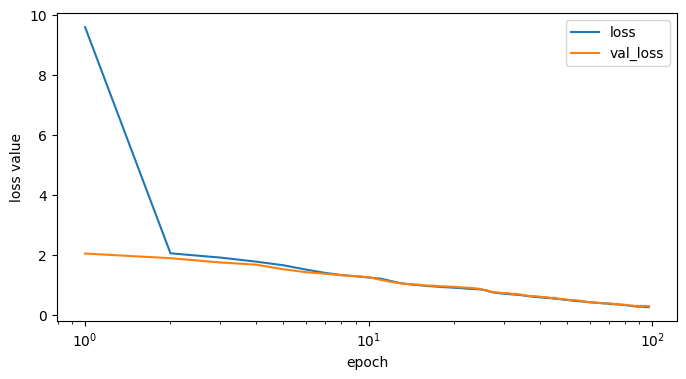

In [56]:
# plot losses against epoch number in log-scale
plt.figure(figsize=(8,4),dpi=100)
plt.semilogx(epoch, loss, linewidth=1.5, label='loss')
plt.semilogx(epoch, val_loss, linewidth=1.5, label='val_loss')

plt.xlabel('epoch',fontsize=10)
plt.ylabel('loss value',fontsize=10)
plt.legend(loc=1,fontsize=10);